<a href="https://colab.research.google.com/github/mnilsson8/DSPS_mNilsson/blob/main/HW5/hacking_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pylab as pl
#!pip install astropy
import astropy
from astropy import units as u


%pylab inline


Populating the interactive namespace from numpy and matplotlib


# Derive empirically the value of $\pi$ knwoing that the ratio of the area of the square and the inscribed circle is π / 4.



In [3]:
def square(l, ax):
  ax.plot([-l, l], [-l, -l], 'k-')
  ax.plot([-l, l], [l, l], 'k-')
  ax.plot([-l, -l], [-l, l], 'k-')
  ax.plot([l, l], [-l, l], 'k-')


In [4]:
def circle(l, ax):
  theta = np.linspace(0, 360, 100)
  theta *= u.degree
  x = l * np.cos(theta.to(u.rad))
  y = l * np.sin(theta.to(u.rad))
  ax.plot(x, y, 'k-')


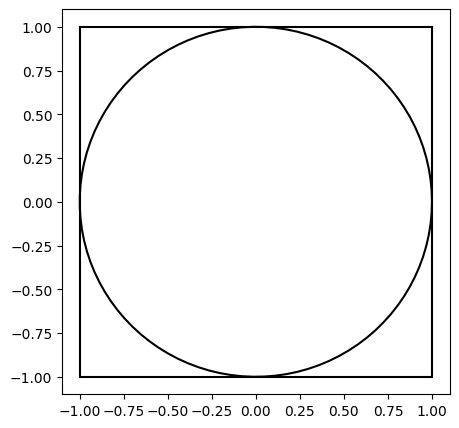

In [5]:
fig, ax = pl.subplots(figsize=(5, 5))
square(1, ax=ax)
circle(1, ax=ax)

**Fig 1:** This figure shows a square with side lengths 2 with an inscribed circle.

In [6]:
# define a function that determins if a random point in the square is inside or outside of the circle
def isin(x, y, l):
  if np.sqrt(x**2+y**2) <= l:
    return True
  else:
    return False

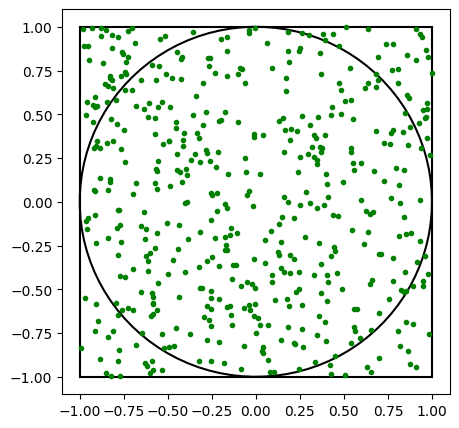

In [7]:
# draw a bunch coordinates (x,y) inside the suqre. how many?
# remember what to do before starting the random calls
np.random.seed(800)
n = 500
l = 1
x = 2*l*np.random.rand(n)-1
y = 2*l*np.random.rand(n)-1
fig, ax = pl.subplots(figsize=(5, 5))
square(l, ax=ax)
circle(l, ax=ax)
ax.plot(x,y, "g.")


**Fig 2:** This figure shows a square with side length of 2 with an inscribed circle. The points in green are 500 randomly generated coordinates within the area of the square.

In [10]:
# what is the ratio of points in and out of the circle? can you get to pi from it?
inorout_list = np.zeros(n)
for i in range(n):
  inorout_list[i]=(isin(x[i],y[i],l))
points_in_circle = inorout_list.sum()
ratio_in_or_out = points_in_circle/n
hacked_pi = 4*ratio_in_or_out
print("The value of pi calculated is", hacked_pi)

The value of pi calculated is 3.12
